# Cliff Walking Problem

This is a standard un-discounted, episodic task, with start and goal states, and the usual actions causing movement up, down, right, and left. Reward is -1 on all transitions except those into the region marked Cliff. Stepping into this region incurs a reward of optimal path -100 and sends the agent instantly back to the start.



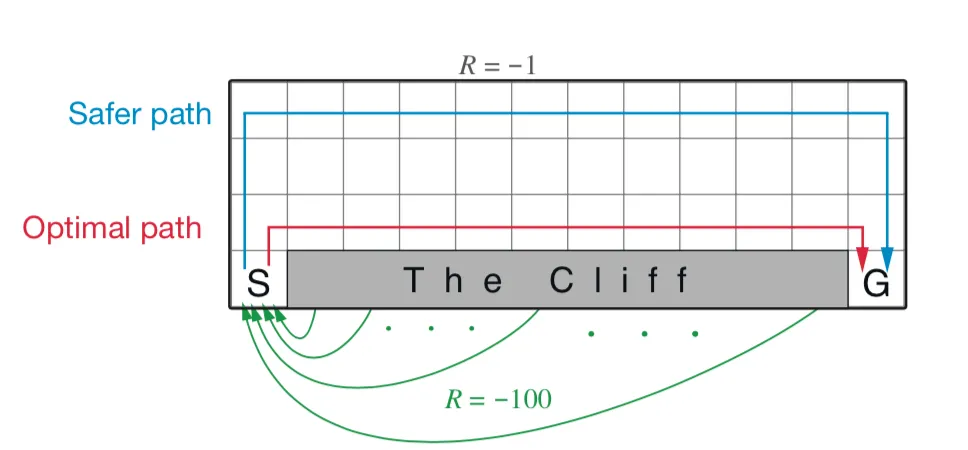

[Cliff Walking](https://www.gymlibrary.dev/environments/toy_text/cliff_walking/)

# Looking for the solution

## Loading gym library

In [ ]:
!pip install gym==0.17.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.2 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654651 sha256=6176ba2692b0bfdbe534957078c6fb4f71a6923ecd913233286826a15f8fa40f
  Stored in directory: /root/.cache/pip/wheels/5d/06/a4/57a926b2e87a5e1f21551577750549206dde639e19a5ac72d5
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


## Libraries load

In [ ]:
import gym
import numpy as np
from collections import defaultdict

env = gym.make('CliffWalking-v0')

## Environment

Four unique actions:
0: move up
1: move right
2: move down
3: move left

In [ ]:
print(env.action_space)
nactions = env.action_space.n

Discrete(4)


Dimensiones del entorno: 4 x 12

In [ ]:
print(env.observation_space)

Discrete(48)


3x12 + 1 possible states, since reaching the cliff or the goal finishes the episode.

## greedy policy

In [ ]:
#trade-off between exploring and exploiting
def greedy(epsilon, q_table, state):
    prob = np.ones((nactions,)) * epsilon/nactions
    prob[np.argmax(q_table[state])] = 1 - epsilon + epsilon/nactions
    action = np.random.choice(np.arange(nactions), p=prob)
    return action

## Training of 100 episodes

In [ ]:
# For table Q we will use a dictionary that does not mark an error when the key does not exist
q_table = defaultdict(lambda: np.zeros((nactions,)))

# Hyperparameters
alpha = 0.2 # learning rate
gamma = 1 # discount rate
epsilon = 0.99 # greedy policy

episodes = 100

for i in range(episodes):
    state = env.reset()
    done = False

    timestep = 0
    total_reward = 0
    
    while not done:
        action = greedy(epsilon, q_table,state) # we apply greedy policy
        next_state, reward, done, _ = env.step(action)
        next_action = greedy(epsilon, q_table,next_state) # we apply the greedy policy for the following action
        total_reward += reward
        tmp = q_table[state][action]
        q_table[state][action] = tmp + alpha * (reward + gamma * np.max(q_table[next_state]) - tmp) # we update Q value
        state,action = next_state, next_action
        timestep += 1
    if (i+1) % 100 == 0:
        print(f"Episode: {i+1}, Reward:{total_reward}")

print("Training finished.\n")

Episode: 100, Reward:-53686
Training finished.



In [ ]:
policy = np.array([np.argmax(q_table[key]) if key in q_table else -1 for key in np.arange(48)]).reshape(4,12)

In [ ]:
policy

array([[ 1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  2,  2],
       [ 1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0]])

## Training of 3000 episodes - Solution

In [ ]:
# For table Q we will use a dictionary that does not mark an error when the key does not exist
q_table = defaultdict(lambda: np.zeros((nactions,)))

# Hyperparameters
alpha = 0.2 # learning rate
gamma = 1 # discount rate
epsilon = 0.99 # greedy policy

episodes = 3000

for i in range(episodes):
    state = env.reset()
    done = False

    timestep = 0
    total_reward = 0
    
    while not done:
        action = greedy(epsilon, q_table,state) # we apply greedy policy
        next_state, reward, done, _ = env.step(action)
        next_action = greedy(epsilon, q_table,next_state) # we apply the greedy policy for the following action
        total_reward += reward
        tmp = q_table[state][action]
        q_table[state][action] = tmp + alpha * (reward + gamma * np.max(q_table[next_state]) - tmp) # we update Q value
        state,action = next_state, next_action
        timestep += 1
    if (i+1) % 100 == 0:
        print(f"Episode: {i+1}, Reward:{total_reward}")

print("Training finished.\n")

Episode: 100, Reward:-86915
Episode: 200, Reward:-35496
Episode: 300, Reward:-12424
Episode: 400, Reward:-10675
Episode: 500, Reward:-208645
Episode: 600, Reward:-69281
Episode: 700, Reward:-60442
Episode: 800, Reward:-12163
Episode: 900, Reward:-65426
Episode: 1000, Reward:-50680
Episode: 1100, Reward:-19332
Episode: 1200, Reward:-8142
Episode: 1300, Reward:-127486
Episode: 1400, Reward:-35401
Episode: 1500, Reward:-8151
Episode: 1600, Reward:-15636
Episode: 1700, Reward:-4793
Episode: 1800, Reward:-41431
Episode: 1900, Reward:-21906
Episode: 2000, Reward:-34659
Episode: 2100, Reward:-10124
Episode: 2200, Reward:-201171
Episode: 2300, Reward:-19167
Episode: 2400, Reward:-30169
Episode: 2500, Reward:-9187
Episode: 2600, Reward:-27915
Episode: 2700, Reward:-80047
Episode: 2800, Reward:-11876
Episode: 2900, Reward:-126742
Episode: 3000, Reward:-6320
Training finished.



In [ ]:
policy = np.array([np.argmax(q_table[key]) if key in q_table else -1 for key in np.arange(48)]).reshape(4,12)

In [ ]:
policy

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0]])

# To sum up

The solution to the Cliff Walking problem has been given using Q-Learning. For this problem it was better to use a dictionary to manage the cases of non-existence of Keys, and thus find the solution. Several functions of Greedy (exploration and exploitation) have been tested and this has been the best that has worked. It has also been tested with several hyperparameters, finding the best ones that have led to the solution. It should be noted that this problem was somehow easier than the Taxi problem, since there were only rewards, even if they were negative, and the origin and destination are always the same. In the end, it has been tested with only 100 episodes, which have not been enough to reach the solution. With 3000 episodes the solution seems OK.

---
